# U.S. Medical Insurance Costs

In [15]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv


def insurance_file_loader(insure_file):
  with open(insure_file, newline='') as insur_csv:
    insur_dict = csv.DictReader(insur_csv,delimiter=',')
    sortedlist = sorted(insur_dict, key=lambda row: row['age'], reverse=True)
  return sortedlist

def dataframe_loader(insure_file):
  return pd.read_csv(insure_file)

class InsuranceInfo:
  def __init__(self, insure_file):
    self.sortedlist = insurance_file_loader(insure_file)
    self.df = dataframe_loader(insure_file)
    self.ages = []
    self.age_bucket = []
    self.age_buckets = []
    self.sex = []
    self.bmi = []
    self.children = []
    self.smoker = []
    self.region = []
    self.charges = []
    self.dimensions = ['Ages', 'Sexes', "BMIs", 'Children', 'Smokers', 'Regions', 'Charges']
    self.dimlist = []

  
    for insur in self.sortedlist:
      self.ages.append(float(insur['age']))
      temp_age_bucket = float(insur['age']) - (float(insur['age']) % 10)
      self.age_bucket.append(temp_age_bucket)
      if temp_age_bucket not in self.age_buckets: self.age_buckets.append(temp_age_bucket)
      self.charges.append(float(insur['charges']))
      self.sex.append(insur['sex'])
      self.bmi.append(float(insur['bmi']))
      self.children.append(int(insur['children']))
      self.smoker.append(insur['smoker'])
      self.region.append(insur['region'])
      

    self.dimlist = [self.ages, self.sex, self.bmi, self.children, self.smoker, self.region, self.charges]

    self.df.sort_values(by=['age'])
    self.df['age_num'] = self.df['age'].astype('float')
    self.df['age_bucket'] = self.df['age_num'] - (self.df['age_num'] % 10)

    self.smoker_table = pd.DataFrame.pivot  
    self.init_smoker_table()

  def plot_hist(self,dimension):
    index = self.dimensions.index(dimension)
    xpoints = np.array(self.dimlist[index])
    plt.hist(xpoints)
    plt.figtext(0.4,0.9,dimension.title() + ' Histogram')
    plt.show()

        
  def display_avg_dimension(self,dimension):
    avg_dim = self.df[dimension].sum() / self.df[dimension].count()
    print("Average " + dimension + " is {avg_dim} over {persons} persons.".format(avg_dim=round(avg_dim,2),persons=self.df[dimension].count()))
      
  def display_charges_by_sex_chart(self):
      table = np.round(pd.pivot_table(self.df, values='charges', index=['age_bucket'],columns=['sex'], aggfunc="mean", fill_value=0, observed=True),2)
      table.plot(legend=True, title = 'Charges by Age and Sex', xlabel='Age', ylabel='Charges')

  def display_charges_by_region_chart(self):
    region_table = np.round(pd.pivot_table(self.df, values='charges', index=['age_bucket'],columns=['region'], aggfunc="mean", fill_value=0, observed=True),2)
    region_table.plot(legend=True, title = 'Charges by Age and Region', xlabel='Age', ylabel='Charges')

  def init_smoker_table(self):
    smoker_table = np.round(pd.pivot_table(self.df, values='charges', index=['age_bucket'],columns=['smoker'], aggfunc="mean", fill_value=0, observed=True),2)
    smoker_table.style.format({'charges':'${0:,.0f}'})
    self.smoker_table = smoker_table
    
  def display_charges_by_smoker_status_chart(self):
    self.smoker_table.plot(legend=True, title = 'Charges by Age and Smoking Status', xlabel='Age', ylabel='Charges')

  def display_smoker_table(self):
    smoker_df = pd.DataFrame(self.smoker_table.to_records())
    smoker_df['smoker_premium'] = smoker_df['yes'] - smoker_df['no']
    smoker_df['smoker_perc_increase'] = round(smoker_df['smoker_premium'] / smoker_df['no'],2) * 100.0
    display(smoker_df)

  def display_smoker_premium(self):
    smoker_df = self.df[self.df['smoker'] == 'yes']
    non_smoker_df = self.df[self.df['smoker'] == 'no']
    avg_smoker_charge = smoker_df['charges'].sum() / smoker_df['charges'].count()
    avg_non_smoker_charge = non_smoker_df['charges'].sum() / non_smoker_df['charges'].count()
    avg_diff = avg_smoker_charge - avg_non_smoker_charge 
    perc_diff = avg_diff / avg_non_smoker_charge
    print("The smoker premium on average is {avg_diff}, which is a {perc_diff} increase".format(avg_diff='${:,.2f}'.format(avg_diff), perc_diff='{:.1%}'.format(perc_diff)))

insure_info = InsuranceInfo('insurance.csv')



# {'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}


Review histograms of insurance data dimensions


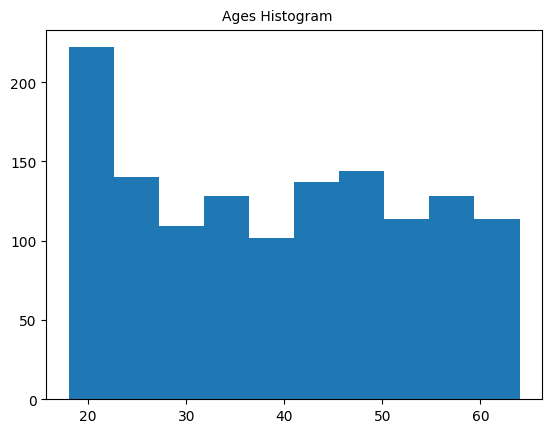

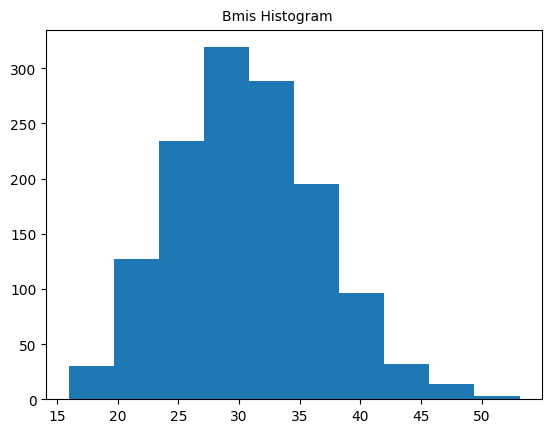

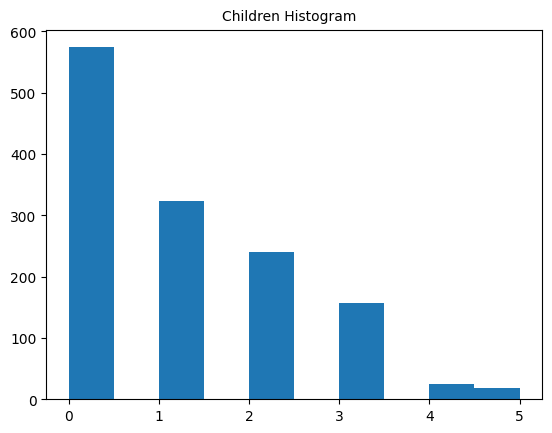

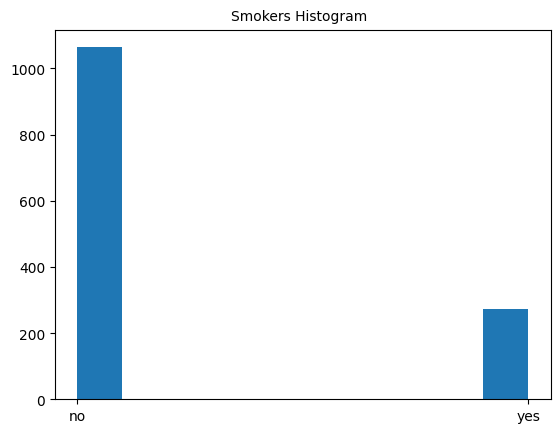

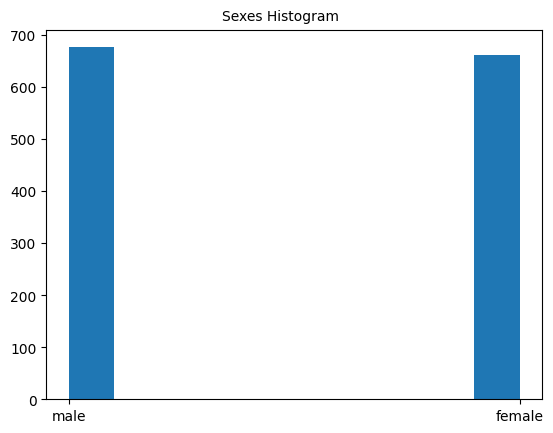

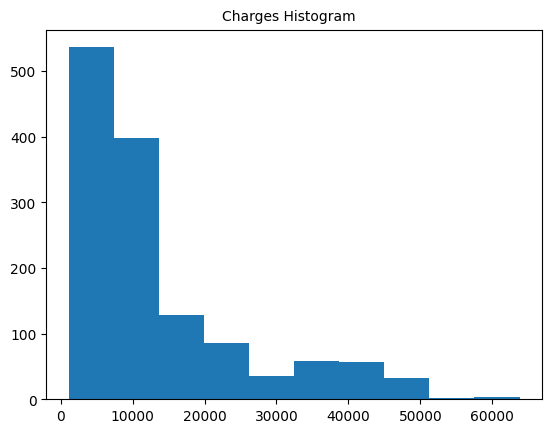

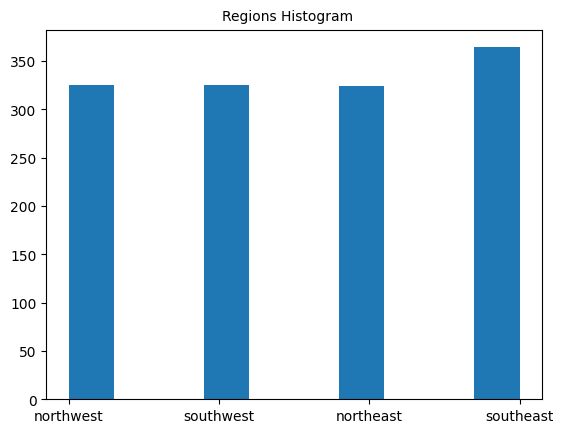

In [2]:
print("Review histograms of insurance data dimensions")
insure_info.plot_hist('Ages')
insure_info.plot_hist('BMIs')
insure_info.plot_hist('Children')
insure_info.plot_hist('Smokers')
insure_info.plot_hist('Sexes')
insure_info.plot_hist('Charges')
insure_info.plot_hist('Regions')

In [3]:
insure_info.display_avg_dimension('age')
insure_info.display_avg_dimension('children')
insure_info.display_avg_dimension('bmi')

Average age is 39.21 over 1338 persons.
Average children is 1.09 over 1338 persons.
Average bmi is 30.66 over 1338 persons.


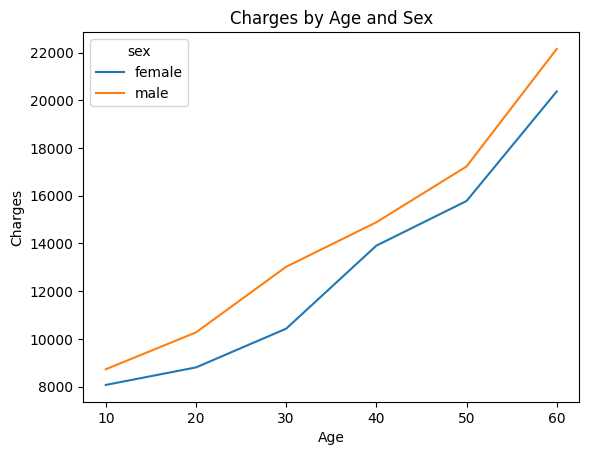

In [4]:
insure_info.display_charges_by_sex_chart()

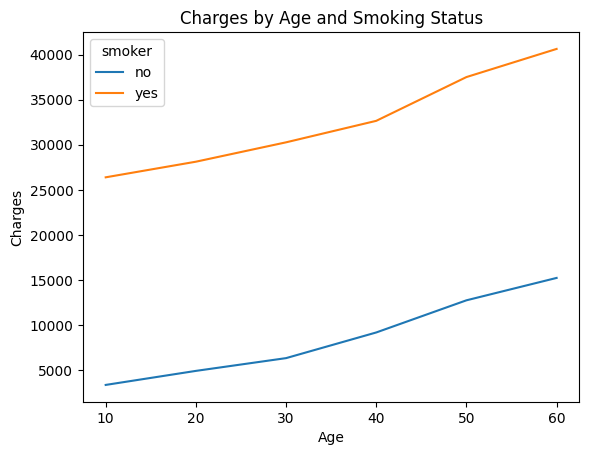

In [5]:
insure_info.display_charges_by_smoker_status_chart()

In [6]:
insure_info.display_smoker_table()

,age_bucket,no,yes,smoker_premium,smoker_perc_increase
0,10.0,3365.42,26390.23,23024.81,684.0
1,20.0,4921.63,28122.22,23200.59,471.0
2,30.0,6337.36,30271.25,23933.89,378.0
3,40.0,9183.34,32654.72,23471.38,256.0
4,50.0,12749.34,37508.75,24759.41,194.0
5,60.0,15232.71,40630.70,25397.99,167.0


In [7]:
insure_info.display_smoker_premium()

The smoker premium on average is $23,615.96, which is a 280.0% increase


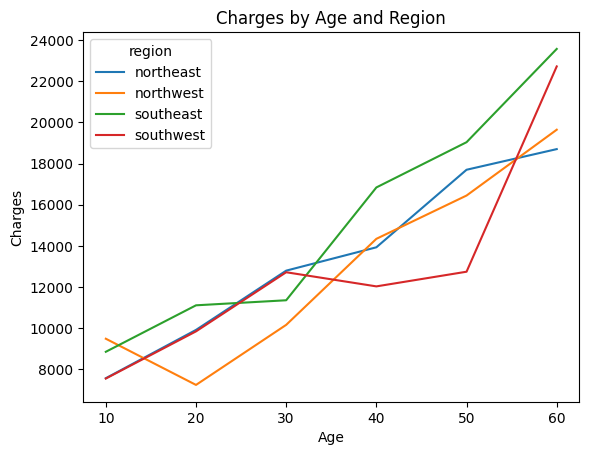

In [8]:
insure_info.display_charges_by_region_chart()

In [9]:
print("There are no clear trends of insurance costs by region")

There are no clear trends of insurance costs by region
